In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Dense, Activation, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load fashion mnist data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
#label name of Fashion MNIST Dataset
label_name = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
np.random.seed(1)

4422102/4422102 [==============================] - 0s 0us/step


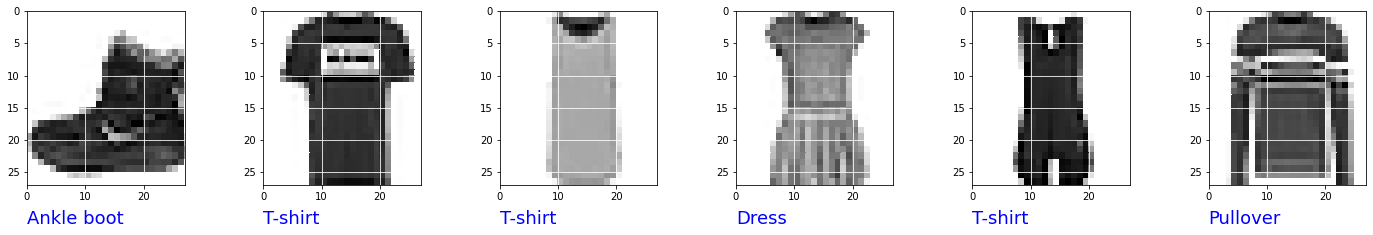

In [3]:
plt.figure(1, figsize=(24, 3.2)) 
plt.subplots_adjust(wspace=0.5) 
plt.gray()

for id in range(6):
    plt.subplot(1, 6, id + 1)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)
    plt.text(0, 33, "%s" % label_name[y_train[id]], color='blue', fontsize=18) 

    plt.xlim(0, 27)
    plt.ylim(27, 0)

    plt.grid('on', color='white') 
plt.show()

In [4]:
def model_show_indicator(MODEL, X_TRAIN, Y_TRAIN, X_TEST, Y_TEST, EPOCHS, BATCH_SIZE):
    startTime = time.time()
    history = MODEL.fit(X_TRAIN, Y_TRAIN, epochs=EPOCHS, batch_size= BATCH_SIZE, verbose=1, validation_data=(X_TEST, Y_TEST))
    endTime = time.time()
    score = MODEL.evaluate(X_TEST, Y_TEST, verbose=0)
    plt.figure(1, figsize = (10, 4))
    plt.subplots_adjust(wspace = 0.5)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label = 'training', color = 'black')
    plt.plot(history.history['val_loss'], label = 'test', color ='cornflowerblue')
    plt.ylim(0, 10)
    plt.legend()
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label = 'training', color = 'black')
    plt.plot(history.history['val_accuracy'], label = 'test', color = 'cornflowerblue')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('acc')
    plt.show()
    print("Computation time: {0: .3f}".format(endTime - startTime))
    print('Test loss: ', score[0])
    print('Test accuracy: ', score[1])

In [5]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.figure(2, figsize = (12, 8))
    plt.gray()
    wrong_answer = 0
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize = 12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color ='cornflowerblue', linewidth = 5)
            wrong_answer = wrong_answer + 1
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
    print("label name of Fashion MNIST Dataset")
    print("T-shirt => 0, Trouser => 1, Pullover => 2, Dress => 3, Coat => 4, Sandal => 5, Shirt => 6, Sneaker => 7, Bag => 8, Ankle boot => 9 ")
    print("Total wrong answer: {0: d} / 96" .format(wrong_answer))
    plt.show()

In [6]:
#initial settings
x_train = x_train.reshape(60000, 784)
x_train = x_train.astype('float32')
x_train = x_train / 255

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255

num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [7]:
# 모델 객체 생성 및 메서드
model = Sequential()
model.add(Dense(16, input_dim = 784, activation = 'sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer= Adam(), metrics=['accuracy'])
# 모델 요약결과 출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
60/60 [==============================] - 1s 8ms/step - loss: 1.9079 - accuracy: 0.4438 - val_loss: 1.6296 - val_accuracy: 0.6417
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 1.4728 - accuracy: 0.6841 - val_loss: 1.3459 - val_accuracy: 0.7011
Epoch 3/10
60/60 [==============================] - 0s 4ms/step - loss: 1.2317 - accuracy: 0.7272 - val_loss: 1.1517 - val_accuracy: 0.7325
Epoch 4/10
60/60 [==============================] - 0s 4ms/step - loss: 1.0657 - accuracy: 0.7564 - val_loss: 1.0144 - val_accuracy: 0.7537
Epoch 5/10
60/60 [==============================] - 0s 4ms/step - loss: 0.9450 - accuracy: 0.7763 - val_loss: 0.9131 - val_accuracy: 0.7713
Epoch 6/10
60/60 [==============================] - 0s 4ms/step - loss: 0.8548 - accuracy: 0.7909 - val_loss: 0.8352 - val_accuracy: 0.7846
Epoch 7/10
60/60 [==============================] - 0s 4ms/step - loss: 0.7853 - accuracy: 0.8002 - val_loss: 0.7753 - val_accuracy: 0.7920
Epoch 8/10
60/60 [==

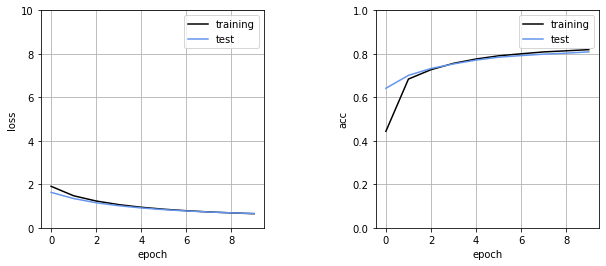

Computation time:  3.173
Test loss:  0.6561590433120728
Test accuracy:  0.8091999888420105


In [8]:
model_show_indicator(model, x_train, y_train, x_test, y_test, 10, 1000)

313/313 [==============================] - 0s 956us/step
label name of Fashion MNIST Dataset
T-shirt => 0, Trouser => 1, Pullover => 2, Dress => 3, Coat => 4, Sandal => 5, Shirt => 6, Sneaker => 7, Bag => 8, Ankle boot => 9 
Total wrong answer:  24 / 96


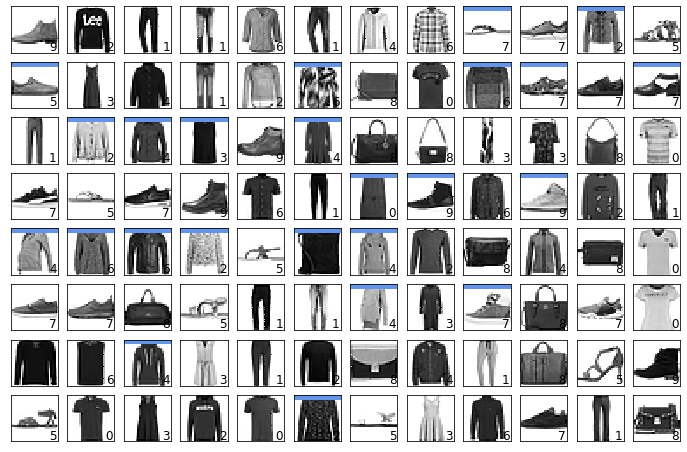

In [9]:
show_prediction()

In [10]:
model = Sequential()
model.add(Dense(16, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer= Adam(), metrics=['accuracy'])
# 모델 요약결과 출력
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                12560     
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
60/60 [==============================] - 1s 7ms/step - loss: 1.4491 - accuracy: 0.5230 - val_loss: 0.9203 - val_accuracy: 0.7158
Epoch 2/10
60/60 [==============================] - 0s 5ms/step - loss: 0.7499 - accuracy: 0.7658 - val_loss: 0.6710 - val_accuracy: 0.7801
Epoch 3/10
60/60 [==============================] - 0s 5ms/step - loss: 0.6056 - accuracy: 0.8063 - val_loss: 0.5873 - val_accuracy: 0.8045
Epoch 4/10
60/60 [==============================] - 0s 6ms/step - loss: 0.5443 - accuracy: 0.8213 - val_loss: 0.5456 - val_accuracy: 0.8170
Epoch 5/10
60/60 [==============================] - 0s 5ms/step - loss: 0.5089 - accuracy: 0.8306 - val_loss: 0.5194 - val_accuracy: 0.8242
Epoch 6/10
60/60 [==============================] - 0s 5ms/step - loss: 0.4847 - accuracy: 0.8363 - val_loss: 0.5023 - val_accuracy: 0.8304
Epoch 7/10
60/60 [==============================] - 0s 4ms/step - loss: 0.4679 - accuracy: 0.8413 - val_loss: 0.4895 - val_accuracy: 0.8303
Epoch 8/10
60/60 [==

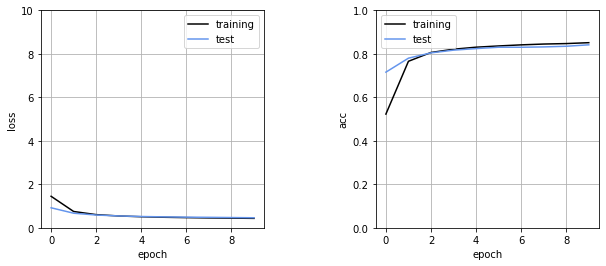

Computation time:  3.528
Test loss:  0.4613685607910156
Test accuracy:  0.8414999842643738


In [11]:
model_show_indicator(model, x_train, y_train, x_test, y_test, 10, 1000)

313/313 [==============================] - 0s 928us/step
label name of Fashion MNIST Dataset
T-shirt => 0, Trouser => 1, Pullover => 2, Dress => 3, Coat => 4, Sandal => 5, Shirt => 6, Sneaker => 7, Bag => 8, Ankle boot => 9 
Total wrong answer:  16 / 96


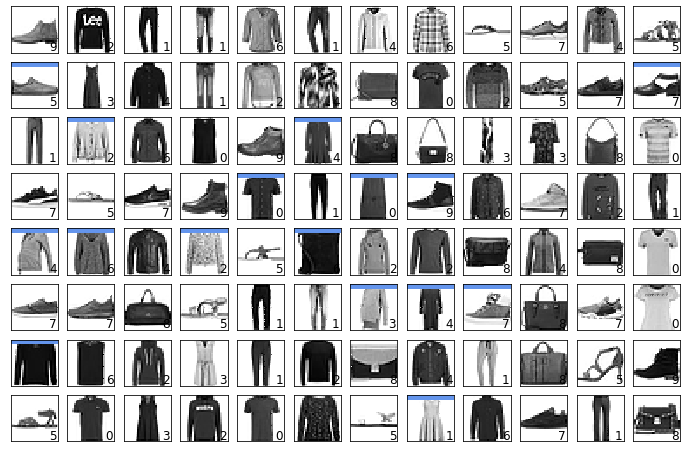

In [12]:
show_prediction()

In [13]:
#load fashion mnist data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [14]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_train = x_train.astype('float32')
x_train = x_train / 255

x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test.astype('float32')
x_test = x_test / 255

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [15]:
model = Sequential()
model.add(Conv2D(8, (3,3), padding ='same', input_shape = (28, 28, 1), activation = 'relu'))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                62730     
                                                                 
Total params: 62,810
Trainable params: 62,810
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
60/60 [==============================] - 5s 78ms/step - loss: 0.9499 - accuracy: 0.7328 - val_loss: 0.5534 - val_accuracy: 0.8075
Epoch 2/10
60/60 [==============================] - 5s 77ms/step - loss: 0.4825 - accuracy: 0.8360 - val_loss: 0.4650 - val_accuracy: 0.8406
Epoch 3/10
60/60 [==============================] - 4s 74ms/step - loss: 0.4205 - accuracy: 0.8569 - val_loss: 0.4324 - val_accuracy: 0.8485
Epoch 4/10
60/60 [==============================] - 4s 73ms/step - loss: 0.3893 - accuracy: 0.8676 - val_loss: 0.4075 - val_accuracy: 0.8577
Epoch 5/10
60/60 [==============================] - 4s 73ms/step - loss: 0.3705 - accuracy: 0.8734 - val_loss: 0.3916 - val_accuracy: 0.8635
Epoch 6/10
60/60 [==============================] - 4s 72ms/step - loss: 0.3530 - accuracy: 0.8795 - val_loss: 0.3858 - val_accuracy: 0.8659
Epoch 7/10
60/60 [==============================] - 4s 72ms/step - loss: 0.3403 - accuracy: 0.8829 - val_loss: 0.3714 - val_accuracy: 0.8702
Epoch 8/10
60

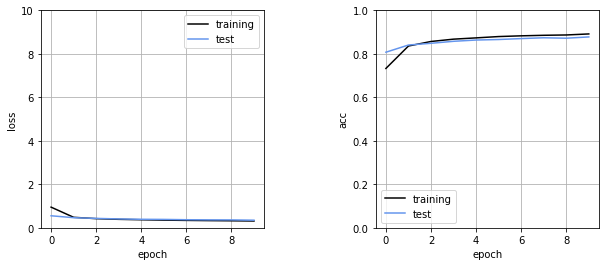

Computation time:  44.639
Test loss:  0.34949856996536255
Test accuracy:  0.8777999877929688


In [16]:
model_show_indicator(model, x_train, y_train, x_test, y_test, 10, 1000)

313/313 [==============================] - 1s 2ms/step
label name of Fashion MNIST Dataset
T-shirt => 0, Trouser => 1, Pullover => 2, Dress => 3, Coat => 4, Sandal => 5, Shirt => 6, Sneaker => 7, Bag => 8, Ankle boot => 9 
Total wrong answer:  10 / 96


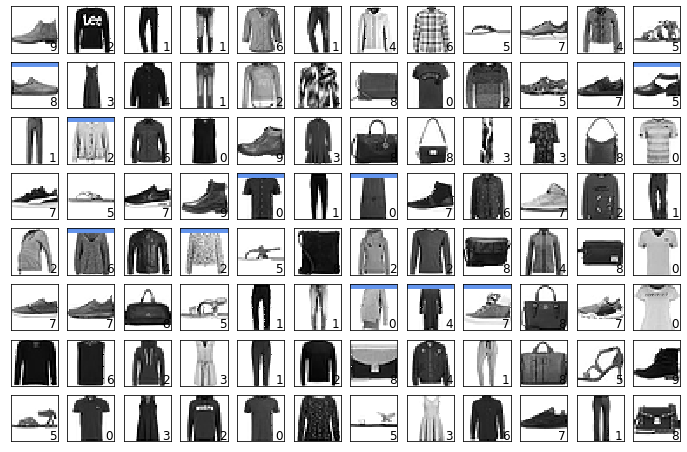

In [17]:
show_prediction()

In [19]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding ='same',input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(32, (3, 3), padding ='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), padding ='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)         

Epoch 1/10
60/60 [==============================] - 43s 701ms/step - loss: 0.9160 - accuracy: 0.6729 - val_loss: 0.5076 - val_accuracy: 0.8142
Epoch 2/10
60/60 [==============================] - 49s 818ms/step - loss: 0.4807 - accuracy: 0.8247 - val_loss: 0.4025 - val_accuracy: 0.8571
Epoch 3/10
60/60 [==============================] - 43s 712ms/step - loss: 0.3966 - accuracy: 0.8570 - val_loss: 0.3532 - val_accuracy: 0.8725
Epoch 4/10
60/60 [==============================] - 46s 762ms/step - loss: 0.3527 - accuracy: 0.8736 - val_loss: 0.3233 - val_accuracy: 0.8829
Epoch 5/10
60/60 [==============================] - 49s 824ms/step - loss: 0.3218 - accuracy: 0.8847 - val_loss: 0.3048 - val_accuracy: 0.8896
Epoch 6/10
60/60 [==============================] - 46s 774ms/step - loss: 0.2959 - accuracy: 0.8923 - val_loss: 0.2854 - val_accuracy: 0.8960
Epoch 7/10
60/60 [==============================] - 42s 697ms/step - loss: 0.2826 - accuracy: 0.8975 - val_loss: 0.2777 - val_accuracy: 0.8985

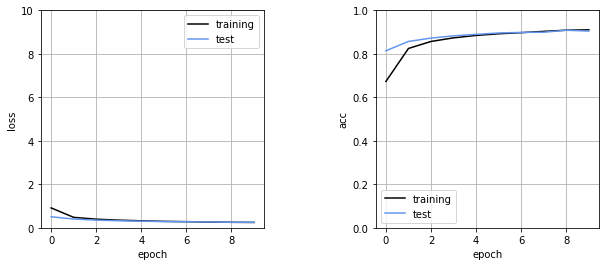

Computation time:  440.249
Test loss:  0.25591760873794556
Test accuracy:  0.904699981212616


In [20]:
model_show_indicator(model, x_train, y_train, x_test, y_test, 10, 1000)

313/313 [==============================] - 3s 8ms/step
label name of Fashion MNIST Dataset
T-shirt => 0, Trouser => 1, Pullover => 2, Dress => 3, Coat => 4, Sandal => 5, Shirt => 6, Sneaker => 7, Bag => 8, Ankle boot => 9 
Total wrong answer:  10 / 96


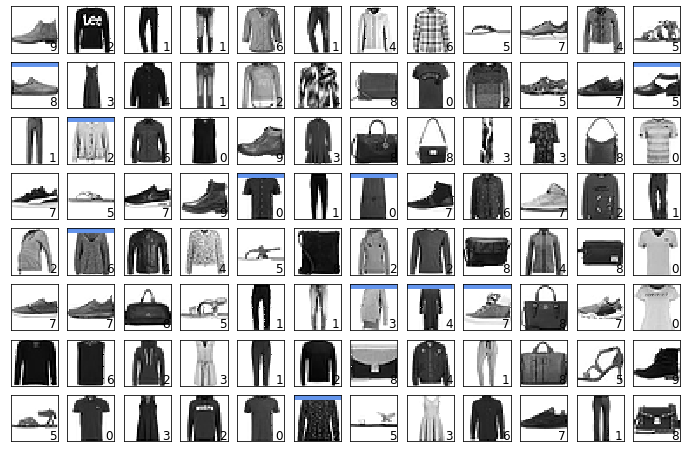

In [21]:
show_prediction()

In [22]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding ='same',input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(32, (3, 3), padding ='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), padding ='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 64)         

Epoch 1/25
1200/1200 [==============================] - 59s 49ms/step - loss: 0.4707 - accuracy: 0.8278 - val_loss: 0.3187 - val_accuracy: 0.8841
Epoch 2/25
1200/1200 [==============================] - 59s 49ms/step - loss: 0.3050 - accuracy: 0.8886 - val_loss: 0.2591 - val_accuracy: 0.9019
Epoch 3/25
1200/1200 [==============================] - 58s 48ms/step - loss: 0.2559 - accuracy: 0.9068 - val_loss: 0.2393 - val_accuracy: 0.9104
Epoch 4/25
1200/1200 [==============================] - 58s 49ms/step - loss: 0.2287 - accuracy: 0.9156 - val_loss: 0.2291 - val_accuracy: 0.9149
Epoch 5/25
1200/1200 [==============================] - 59s 49ms/step - loss: 0.2080 - accuracy: 0.9232 - val_loss: 0.2245 - val_accuracy: 0.9196
Epoch 6/25
1200/1200 [==============================] - 59s 49ms/step - loss: 0.1926 - accuracy: 0.9293 - val_loss: 0.2135 - val_accuracy: 0.9234
Epoch 7/25
1200/1200 [==============================] - 60s 50ms/step - loss: 0.1782 - accuracy: 0.9341 - val_loss: 0.2112 -

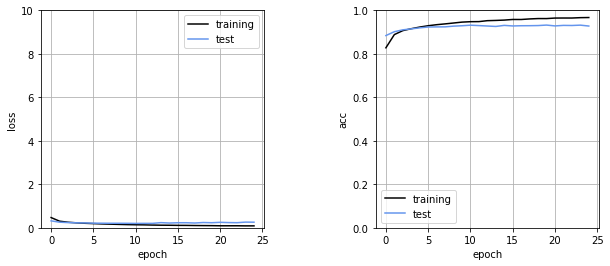

Computation time:  1515.767
Test loss:  0.25781872868537903
Test accuracy:  0.9279000163078308


In [23]:
model_show_indicator(model, x_train, y_train, x_test, y_test, 25, 50)

313/313 [==============================] - 3s 8ms/step
label name of Fashion MNIST Dataset
T-shirt => 0, Trouser => 1, Pullover => 2, Dress => 3, Coat => 4, Sandal => 5, Shirt => 6, Sneaker => 7, Bag => 8, Ankle boot => 9 
Total wrong answer:  7 / 96


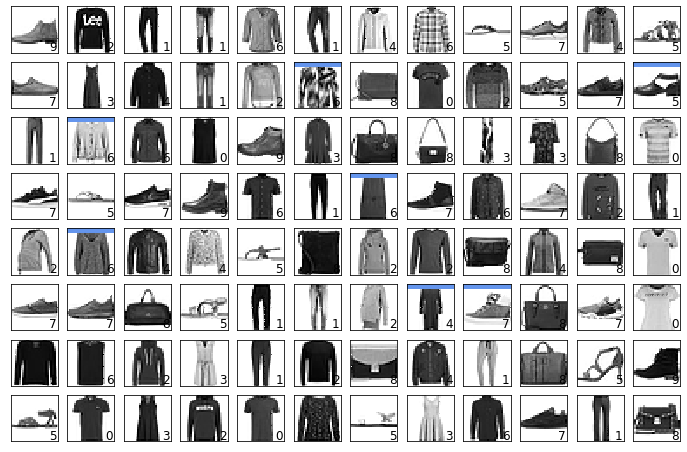

In [24]:
show_prediction()